# BOTNET DETECTION

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading Botnet Flow Statistics

In [2]:
columns = np.arange(0,44) # read the 43 columns
names = ["srcip", "srcport", "dstip", "dstport", "proto",
         "total_fpackets", "total_fvolume", "total_bpackets", "total_bvolume", "min_fpktl",
         "mean_fpktl", "max_fpktl", "std_fpktl", "min_bpktl", "mean_bpktl",
         "max_bpktl", "std_bkptl", "min_fiat", "mean_fiat", "max_fiat",
         "std_fiat", "min_biat", "mean_biat", "max_biat", "std_biat",
         "duration", "min_active", "mean_active", "max_active", "std_active",
         "min_idle", "mean_idle", "max_idle", "std_idle", "sflow_fpackets",
         "sflow_fbytes", "sflow_bpackets", "sflow_bbytes", "fpsh_cnt", "bpsh_cnt",
         "furg_cnt", "burg_cnt", "total_fhlen", "total_bhlen"]
zeus_filename = "all_zeus.csv" # declare filenames
normal_filename = "all_normal.csv" #  declare file names
df_zeus = pd.read_csv(zeus_filename, usecols=columns, names=names) # read files as data frame
df_zeus['is_botnet'] = 1 #  all examples in zeus file are botnets
print(len(df_zeus)) # 
df_zeus.head() #  first 5 columns

524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,10.0.2.19,1039,10.0.2.1,53,17,1,56,1,72,56,...,56,1,72,0,0,0,0,28,20,1
1,10.0.2.2,1037,239.255.255.250,1900,17,3,483,0,0,161,...,161,0,0,0,0,0,0,68,0,1
2,10.0.2.19,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1
3,10.0.2.1,67,10.0.2.19,68,17,2,661,0,0,328,...,661,0,0,0,0,0,0,48,0,1
4,10.0.2.2,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1


# Loading Normal Flow Statistics

In [3]:
normal_df = pd.read_csv(normal_filename, usecols=columns, names=names)
normal_df['is_botnet'] = 0
print(len(normal_df))
df_normal = normal_df.iloc[:len(df_zeus), :]
print(len(df_normal))
df_normal.head(10) #  exactly same thing but not botnet we have 843 rows

843
524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,192.168.0.58,50245,216.58.213.99,443,6,5,729,3,1562,40,...,729,3,1562,1,0,0,0,212,132,0
1,192.168.0.58,50240,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
2,192.168.0.58,50239,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
3,192.168.0.58,50243,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
4,192.168.0.58,50261,216.58.206.78,443,6,6,769,5,3009,40,...,769,5,3009,1,1,0,0,252,212,0
5,192.168.0.58,50263,216.58.206.130,443,6,6,781,4,3032,40,...,781,4,3032,1,0,0,0,264,172,0
6,192.168.0.58,50267,40.77.229.141,443,6,17,14162,27,12726,40,...,14162,27,12726,6,13,0,0,692,1092,0
7,192.168.0.58,50269,216.58.212.99,443,6,10,1204,9,4455,40,...,1204,9,4455,4,4,0,0,412,372,0
8,192.168.0.58,50273,191.232.139.2,443,6,14,6178,15,6023,40,...,6178,15,6023,6,9,0,0,572,612,0
9,192.168.0.58,50275,188.121.36.239,80,6,6,696,6,2519,40,...,696,6,2519,1,1,0,0,252,252,0


# Combining All Data

In [4]:
data = pd.concat([df_zeus, df_normal])
print(len(data))
data = data.sample(frac=1)
data.head()

1048


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
405,192.168.0.58,55378,194.168.4.100,53,17,1,102,1,186,102,...,102,1,186,0,0,0,0,28,20,0
339,192.168.0.58,61293,194.168.4.100,53,17,1,67,1,95,67,...,67,1,95,0,0,0,0,28,20,0
89,192.168.0.58,50448,52.57.54.18,443,6,10,1280,9,4021,40,...,1280,9,4021,4,3,0,0,412,372,0
433,10.0.0.11,26285,79.4.241.217,29455,17,1,133,0,0,133,...,133,0,0,0,0,0,0,28,0,1
176,192.168.0.58,50278,195.95.193.223,443,6,1190,386821,2006,2467345,40,...,42980,222,274149,174,502,0,0,48800,80276,0


# Dataset analysis

In [5]:
data[data.isnull().any(axis=1)].head()

,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet


In [6]:
import numpy as np
np.sum(data.isnull().any(axis=1))

0

In [7]:
data.isnull().any(axis=0)

srcip             False
srcport           False
dstip             False
dstport           False
proto             False
total_fpackets    False
total_fvolume     False
total_bpackets    False
total_bvolume     False
min_fpktl         False
mean_fpktl        False
max_fpktl         False
std_fpktl         False
min_bpktl         False
mean_bpktl        False
max_bpktl         False
std_bkptl         False
min_fiat          False
mean_fiat         False
max_fiat          False
std_fiat          False
min_biat          False
mean_biat         False
max_biat          False
std_biat          False
duration          False
min_active        False
mean_active       False
max_active        False
std_active        False
min_idle          False
mean_idle         False
max_idle          False
std_idle          False
sflow_fpackets    False
sflow_fbytes      False
sflow_bpackets    False
sflow_bbytes      False
fpsh_cnt          False
bpsh_cnt          False
furg_cnt          False
burg_cnt        

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 405 to 62
Data columns (total 45 columns):
srcip             1048 non-null object
srcport           1048 non-null int64
dstip             1048 non-null object
dstport           1048 non-null int64
proto             1048 non-null int64
total_fpackets    1048 non-null int64
total_fvolume     1048 non-null int64
total_bpackets    1048 non-null int64
total_bvolume     1048 non-null int64
min_fpktl         1048 non-null int64
mean_fpktl        1048 non-null int64
max_fpktl         1048 non-null int64
std_fpktl         1048 non-null int64
min_bpktl         1048 non-null int64
mean_bpktl        1048 non-null int64
max_bpktl         1048 non-null int64
std_bkptl         1048 non-null int64
min_fiat          1048 non-null int64
mean_fiat         1048 non-null int64
max_fiat          1048 non-null int64
std_fiat          1048 non-null int64
min_biat          1048 non-null int64
mean_biat         1048 non-null int64
max_biat         

In [9]:
data.describe()

,srcport,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,mean_fpktl,max_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.0,1048.0,1048.000000,1048.000000,1048.000000
mean,34002.579198,6950.801527,13.294847,25.419847,3925.868321,34.547710,4.344807e+04,105.569656,159.251908,473.715649,...,1632.139313,13.336832,1.625758e+04,2.351145,3.907443,0.0,0.0,881.736641,1233.438931,0.500000
std,21633.969317,10215.669372,5.201378,160.799309,22571.931715,280.688187,4.124589e+05,79.705528,166.769398,1274.711514,...,7293.982042,72.355010,1.056138e+05,10.151610,26.277158,0.0,0.0,6556.541592,11113.394555,0.500239
min,67.000000,53.000000,6.000000,1.000000,54.000000,0.000000,0.000000e+00,40.000000,41.000000,54.000000,...,54.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
25%,15684.000000,53.000000,6.000000,1.000000,110.750000,0.000000,0.000000e+00,40.000000,73.000000,94.000000,...,106.750000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
50%,38529.000000,443.000000,17.000000,2.000000,316.500000,1.000000,1.885000e+02,69.000000,128.000000,207.500000,...,262.000000,1.000000,1.800000e+02,0.000000,0.000000,0.0,0.0,48.000000,20.000000,0.500000
75%,50482.250000,16563.750000,17.000000,10.000000,1244.000000,8.250000,4.003000e+03,161.000000,182.500000,494.000000,...,693.000000,6.000000,2.576750e+03,1.000000,2.000000,0.0,0.0,412.000000,358.000000,1.000000
max,65510.000000,29996.000000,17.000000,4278.000000,479966.000000,7916.000000,1.186256e+07,334.000000,2036.000000,16078.000000,...,78856.000000,1583.000000,2.372511e+06,191.000000,502.000000,0.0,0.0,182920.000000,316652.000000,1.000000


In [10]:
data.head()

,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
405,192.168.0.58,55378,194.168.4.100,53,17,1,102,1,186,102,...,102,1,186,0,0,0,0,28,20,0
339,192.168.0.58,61293,194.168.4.100,53,17,1,67,1,95,67,...,67,1,95,0,0,0,0,28,20,0
89,192.168.0.58,50448,52.57.54.18,443,6,10,1280,9,4021,40,...,1280,9,4021,4,3,0,0,412,372,0
433,10.0.0.11,26285,79.4.241.217,29455,17,1,133,0,0,133,...,133,0,0,0,0,0,0,28,0,1
176,192.168.0.58,50278,195.95.193.223,443,6,1190,386821,2006,2467345,40,...,42980,222,274149,174,502,0,0,48800,80276,0


In [11]:
y=data['is_botnet']
y.value_counts()

1    524
0    524
Name: is_botnet, dtype: int64

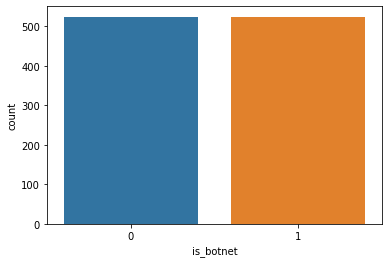

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(data= data, x = "is_botnet")
plt.show()

# HEATMAP

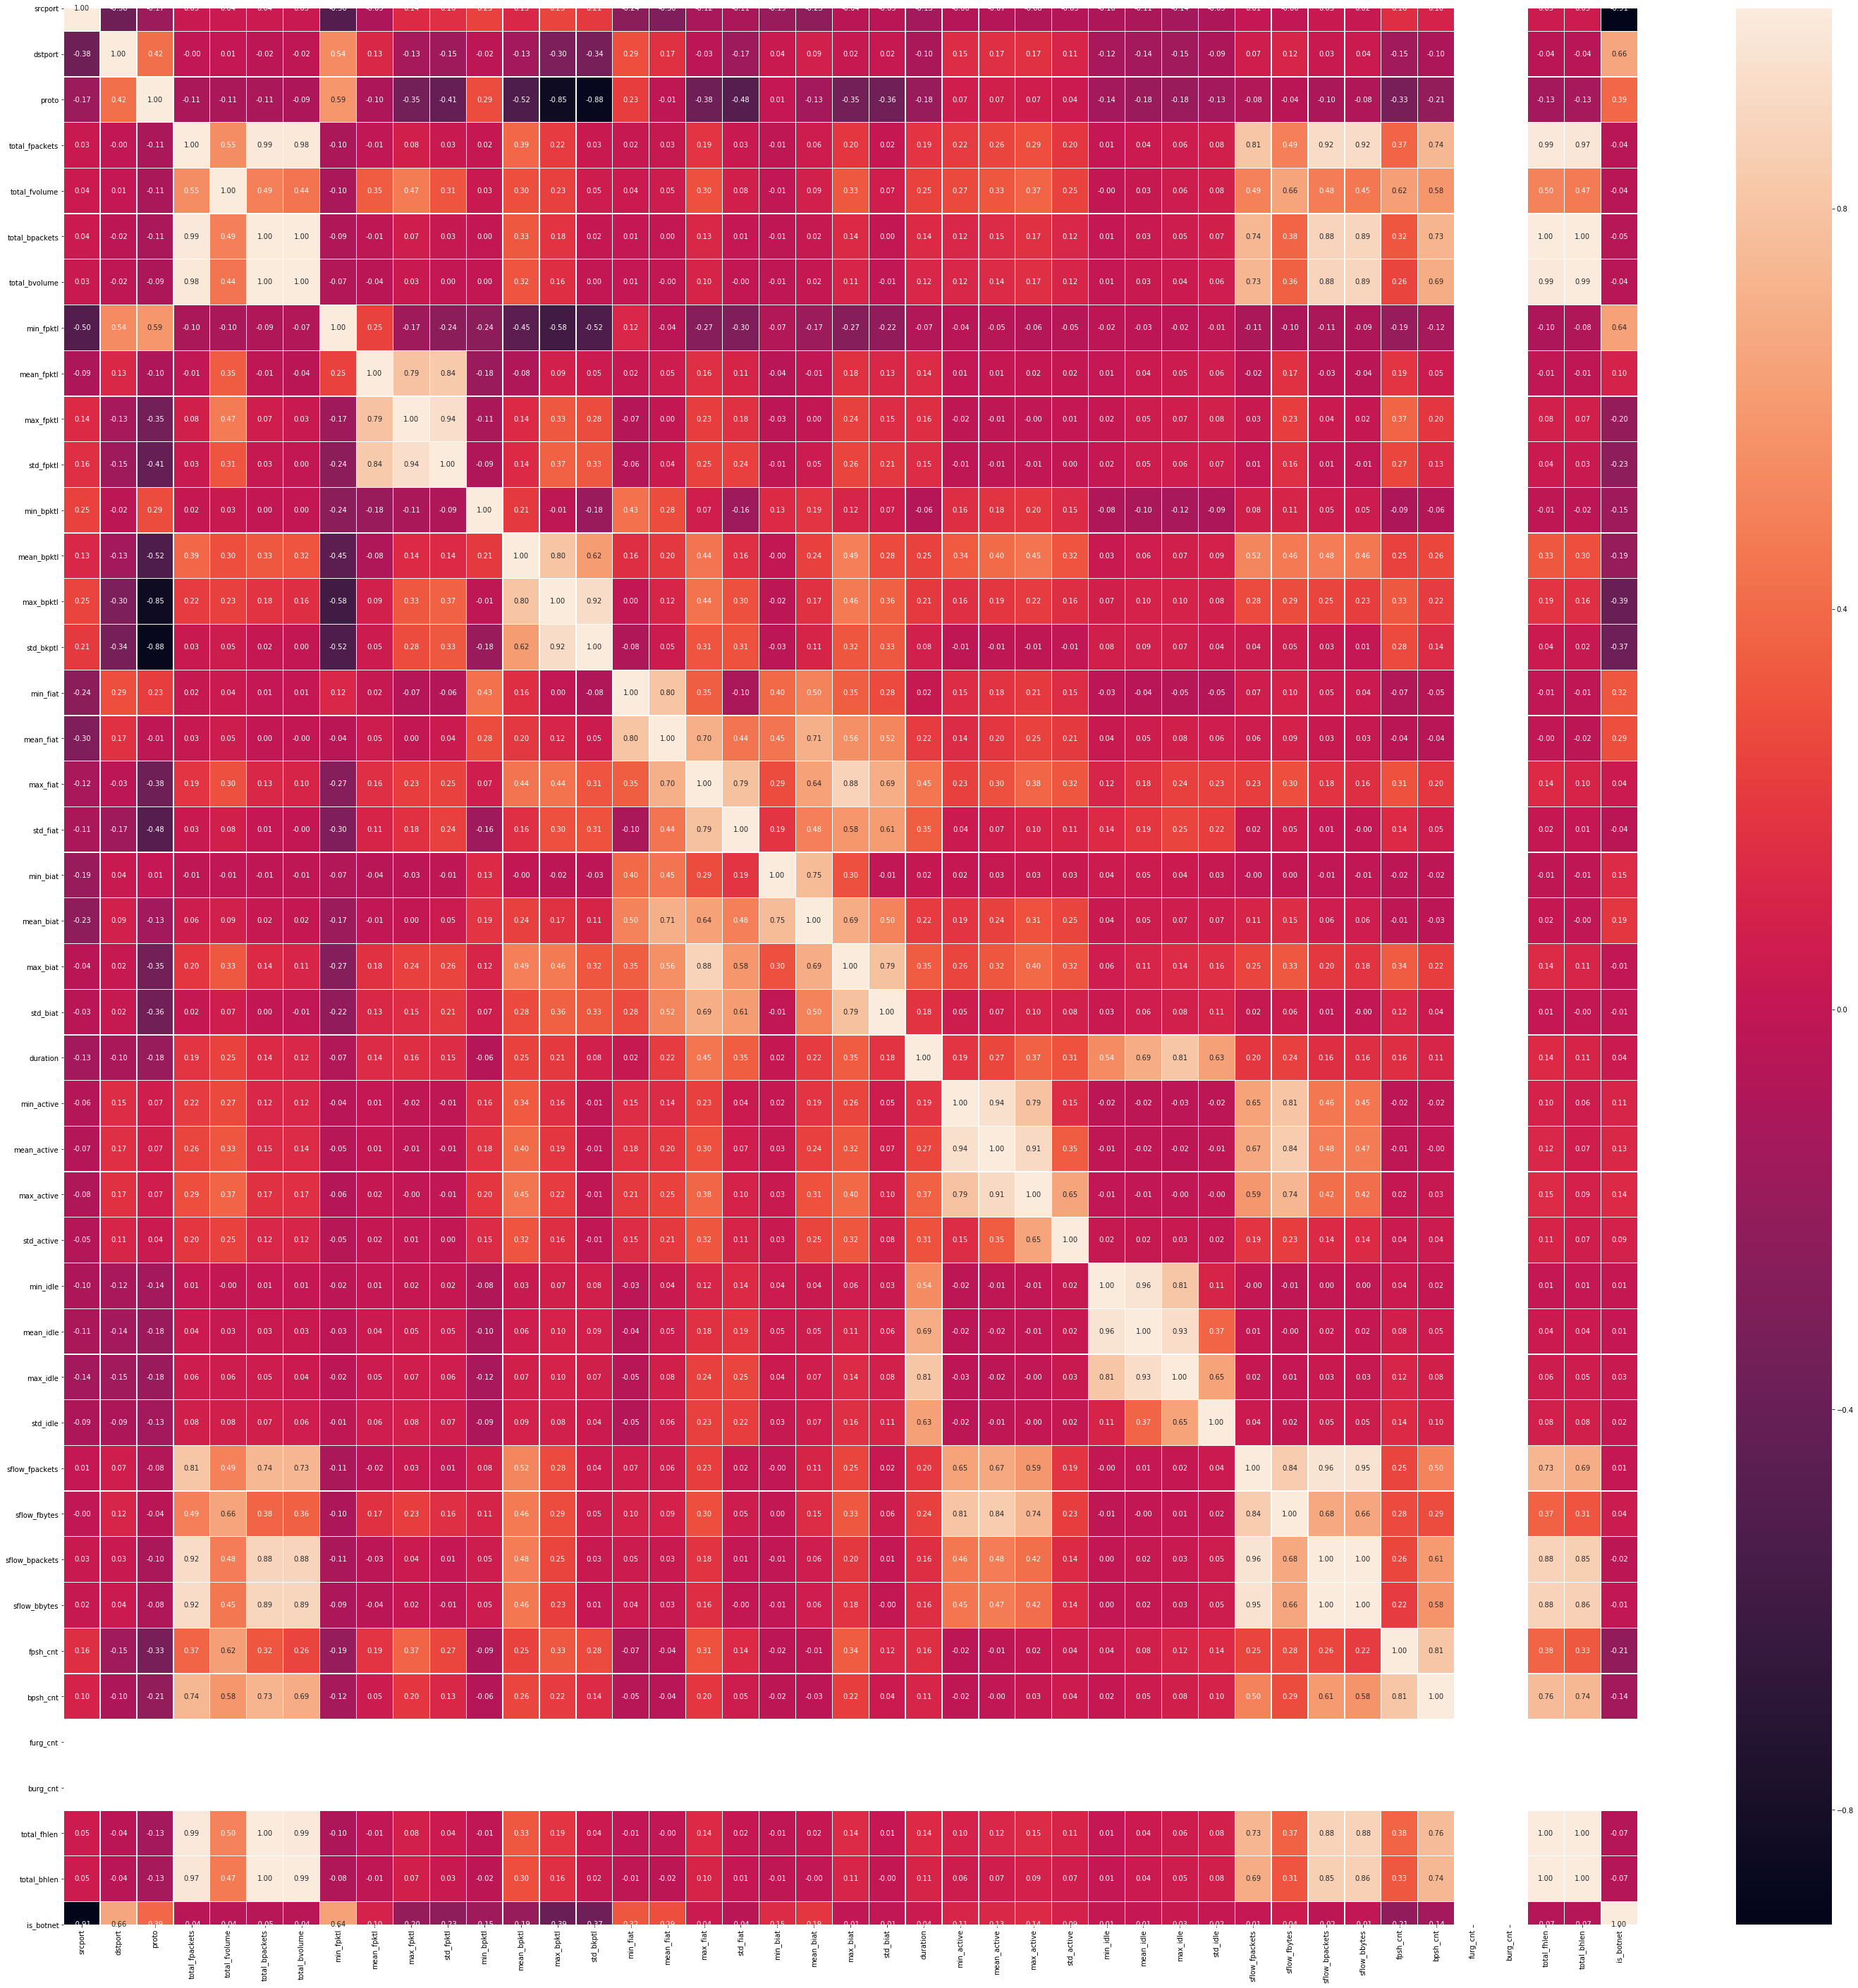

In [13]:
plt.figure(figsize = (50,50))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

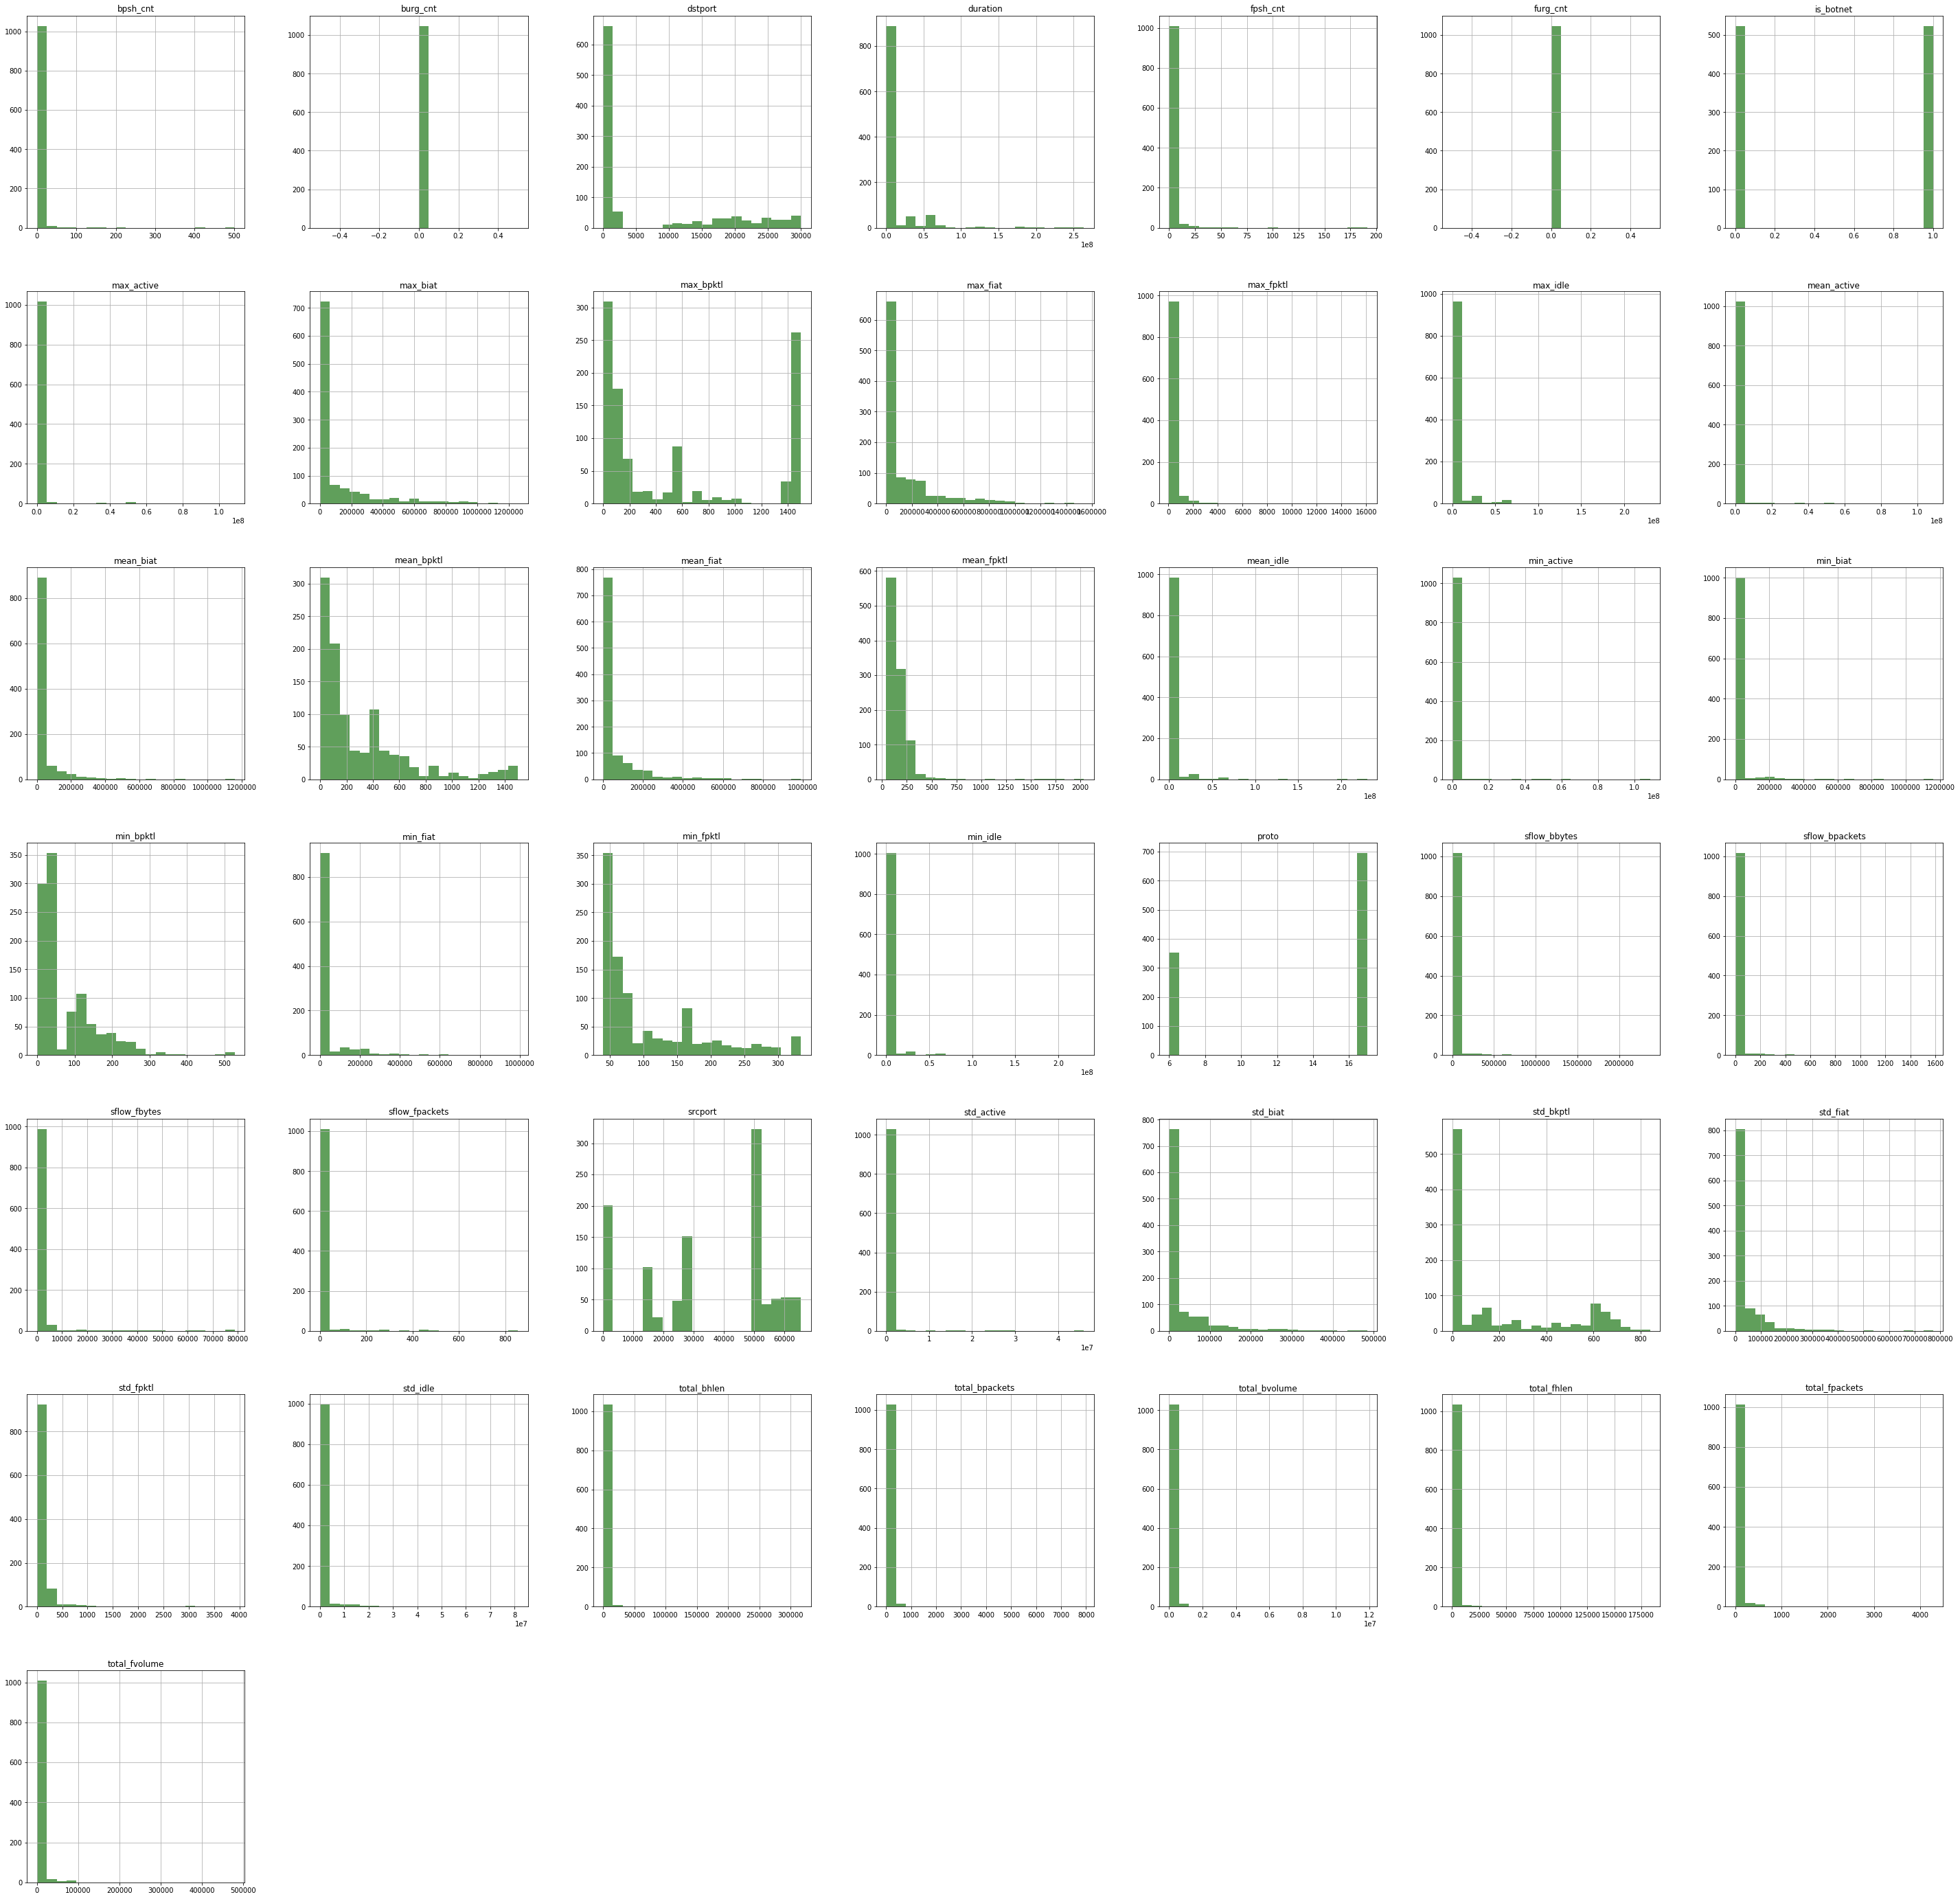

In [14]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

#### Preparing data to apply SMOTE technique

In [15]:
 #Using the unbalanced data
data_all = pd.concat([df_zeus, normal_df])
data_all=data_all[['duration','max_active','max_biat','max_bpktl','max_fiat','mean_bpktl','mean_fpktl','min_active','min_bpktl','min_fpktl','std_active','std_bkptl','is_botnet']]
data_all.shape

(1367, 13)

In [16]:
X=data_all.drop(columns=['is_botnet'])
y=data_all.is_botnet

#Splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (1025, 12)
y_train shape:  (1025,)
X_test shape:  (342, 12)
y_test.shape:  (342,)


In [17]:
# SMOTE technique on train
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [18]:
from collections import Counter
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({0: 640, 1: 385})
After SMOTE :  Counter({0: 640, 1: 640})


## FEATURE SELECTION USING EMBEDDED METHOD
The reason we choose embedded method was because they are iterative in a sense that the model training process. Regularization techniques are more most commonly used in these techniques,lassoCV regularization is the basic of all the embedded methods.

In [19]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 74133.245512
Best score using built-in LassoCV: 0.026605


In [20]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

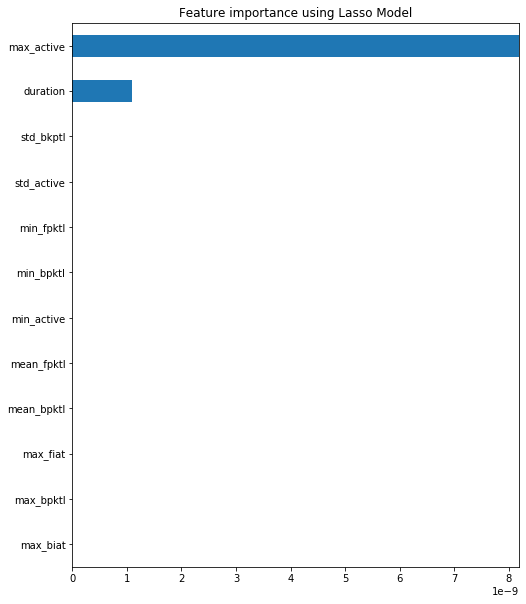

In [21]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

so now our major features are max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_fiat,
max_bpktl,max_fiat,max_bpktl,max_biat, **we will work on these feature** 

# Correlation between the features

In [22]:
feature_coorelation=data_all[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl',
'max_bpktl','max_fiat','max_biat']]

In [23]:
feature_coorelation.head()

,max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_bpktl,max_fiat,max_biat
0,165709,165709,0,0,56,72,165709,56,72,72,0,0
1,0,6007884,0,0,161,-1,0,161,-1,-1,0,0
2,0,0,0,0,161,-1,0,161,-1,-1,0,0
3,113348,113348,0,0,328,-1,113348,330,-1,-1,113348,0
4,0,0,0,0,161,-1,0,161,-1,-1,0,0


In [24]:
feature_corrmat = feature_coorelation.corr() 
feature_corrmat

,max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_bpktl,max_fiat,max_biat
max_active,1.000000,0.372859,0.016296,0.651788,-0.045511,0.151538,0.795649,0.039104,0.447640,0.229413,0.388529,0.405977
duration,0.372859,1.000000,0.131300,0.313718,-0.034474,-0.104341,0.196279,0.176328,0.266588,0.241806,0.470776,0.368507
std_bkptl,0.016296,0.131300,1.000000,0.014147,-0.410755,-0.259464,0.008373,0.125293,0.632449,0.924975,0.372762,0.375903
std_active,0.651788,0.313718,0.014147,1.000000,-0.039792,0.111927,0.155976,0.029676,0.318357,0.165741,0.323247,0.324432
min_fpktl,-0.045511,-0.034474,-0.410755,-0.039792,1.000000,-0.272846,-0.028359,0.288638,-0.385981,-0.472906,-0.198077,-0.203928
min_bpktl,0.151538,-0.104341,-0.259464,0.111927,-0.272846,1.000000,0.121935,-0.233169,0.135017,-0.099476,-0.030805,0.019779
min_active,0.795649,0.196279,0.008373,0.155976,-0.028359,0.121935,1.000000,0.024699,0.342746,0.172052,0.240328,0.265044
mean_fpktl,0.039104,0.176328,0.125293,0.029676,0.288638,-0.233169,0.024699,1.000000,-0.026342,0.156193,0.219069,0.224105
mean_bpktl,0.447640,0.266588,0.632449,0.318357,-0.385981,0.135017,0.342746,-0.026342,1.000000,0.810504,0.474130,0.516028
max_bpktl,0.229413,0.241806,0.924975,0.165741,-0.472906,-0.099476,0.172052,0.156193,0.810504,1.000000,0.484424,0.503484


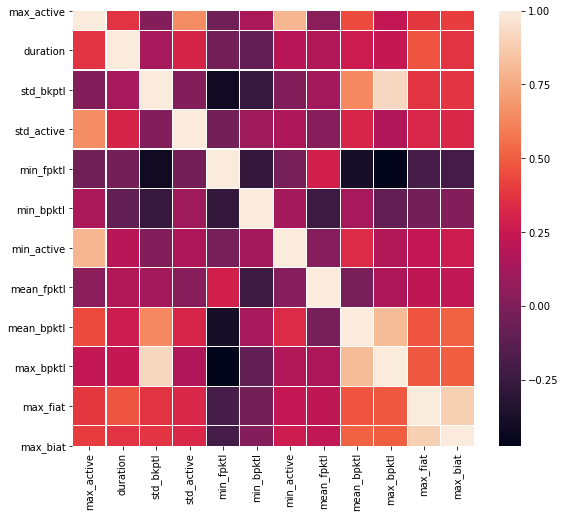

In [25]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(feature_corrmat, ax = ax, linewidths = 0.2) 

Paiplot is used to visualize the correlation diagonals are histogram it means variables are related to each and correlation
are scatterplot, it give the realtionship between other variables

<Figure size 2160x1800 with 0 Axes>

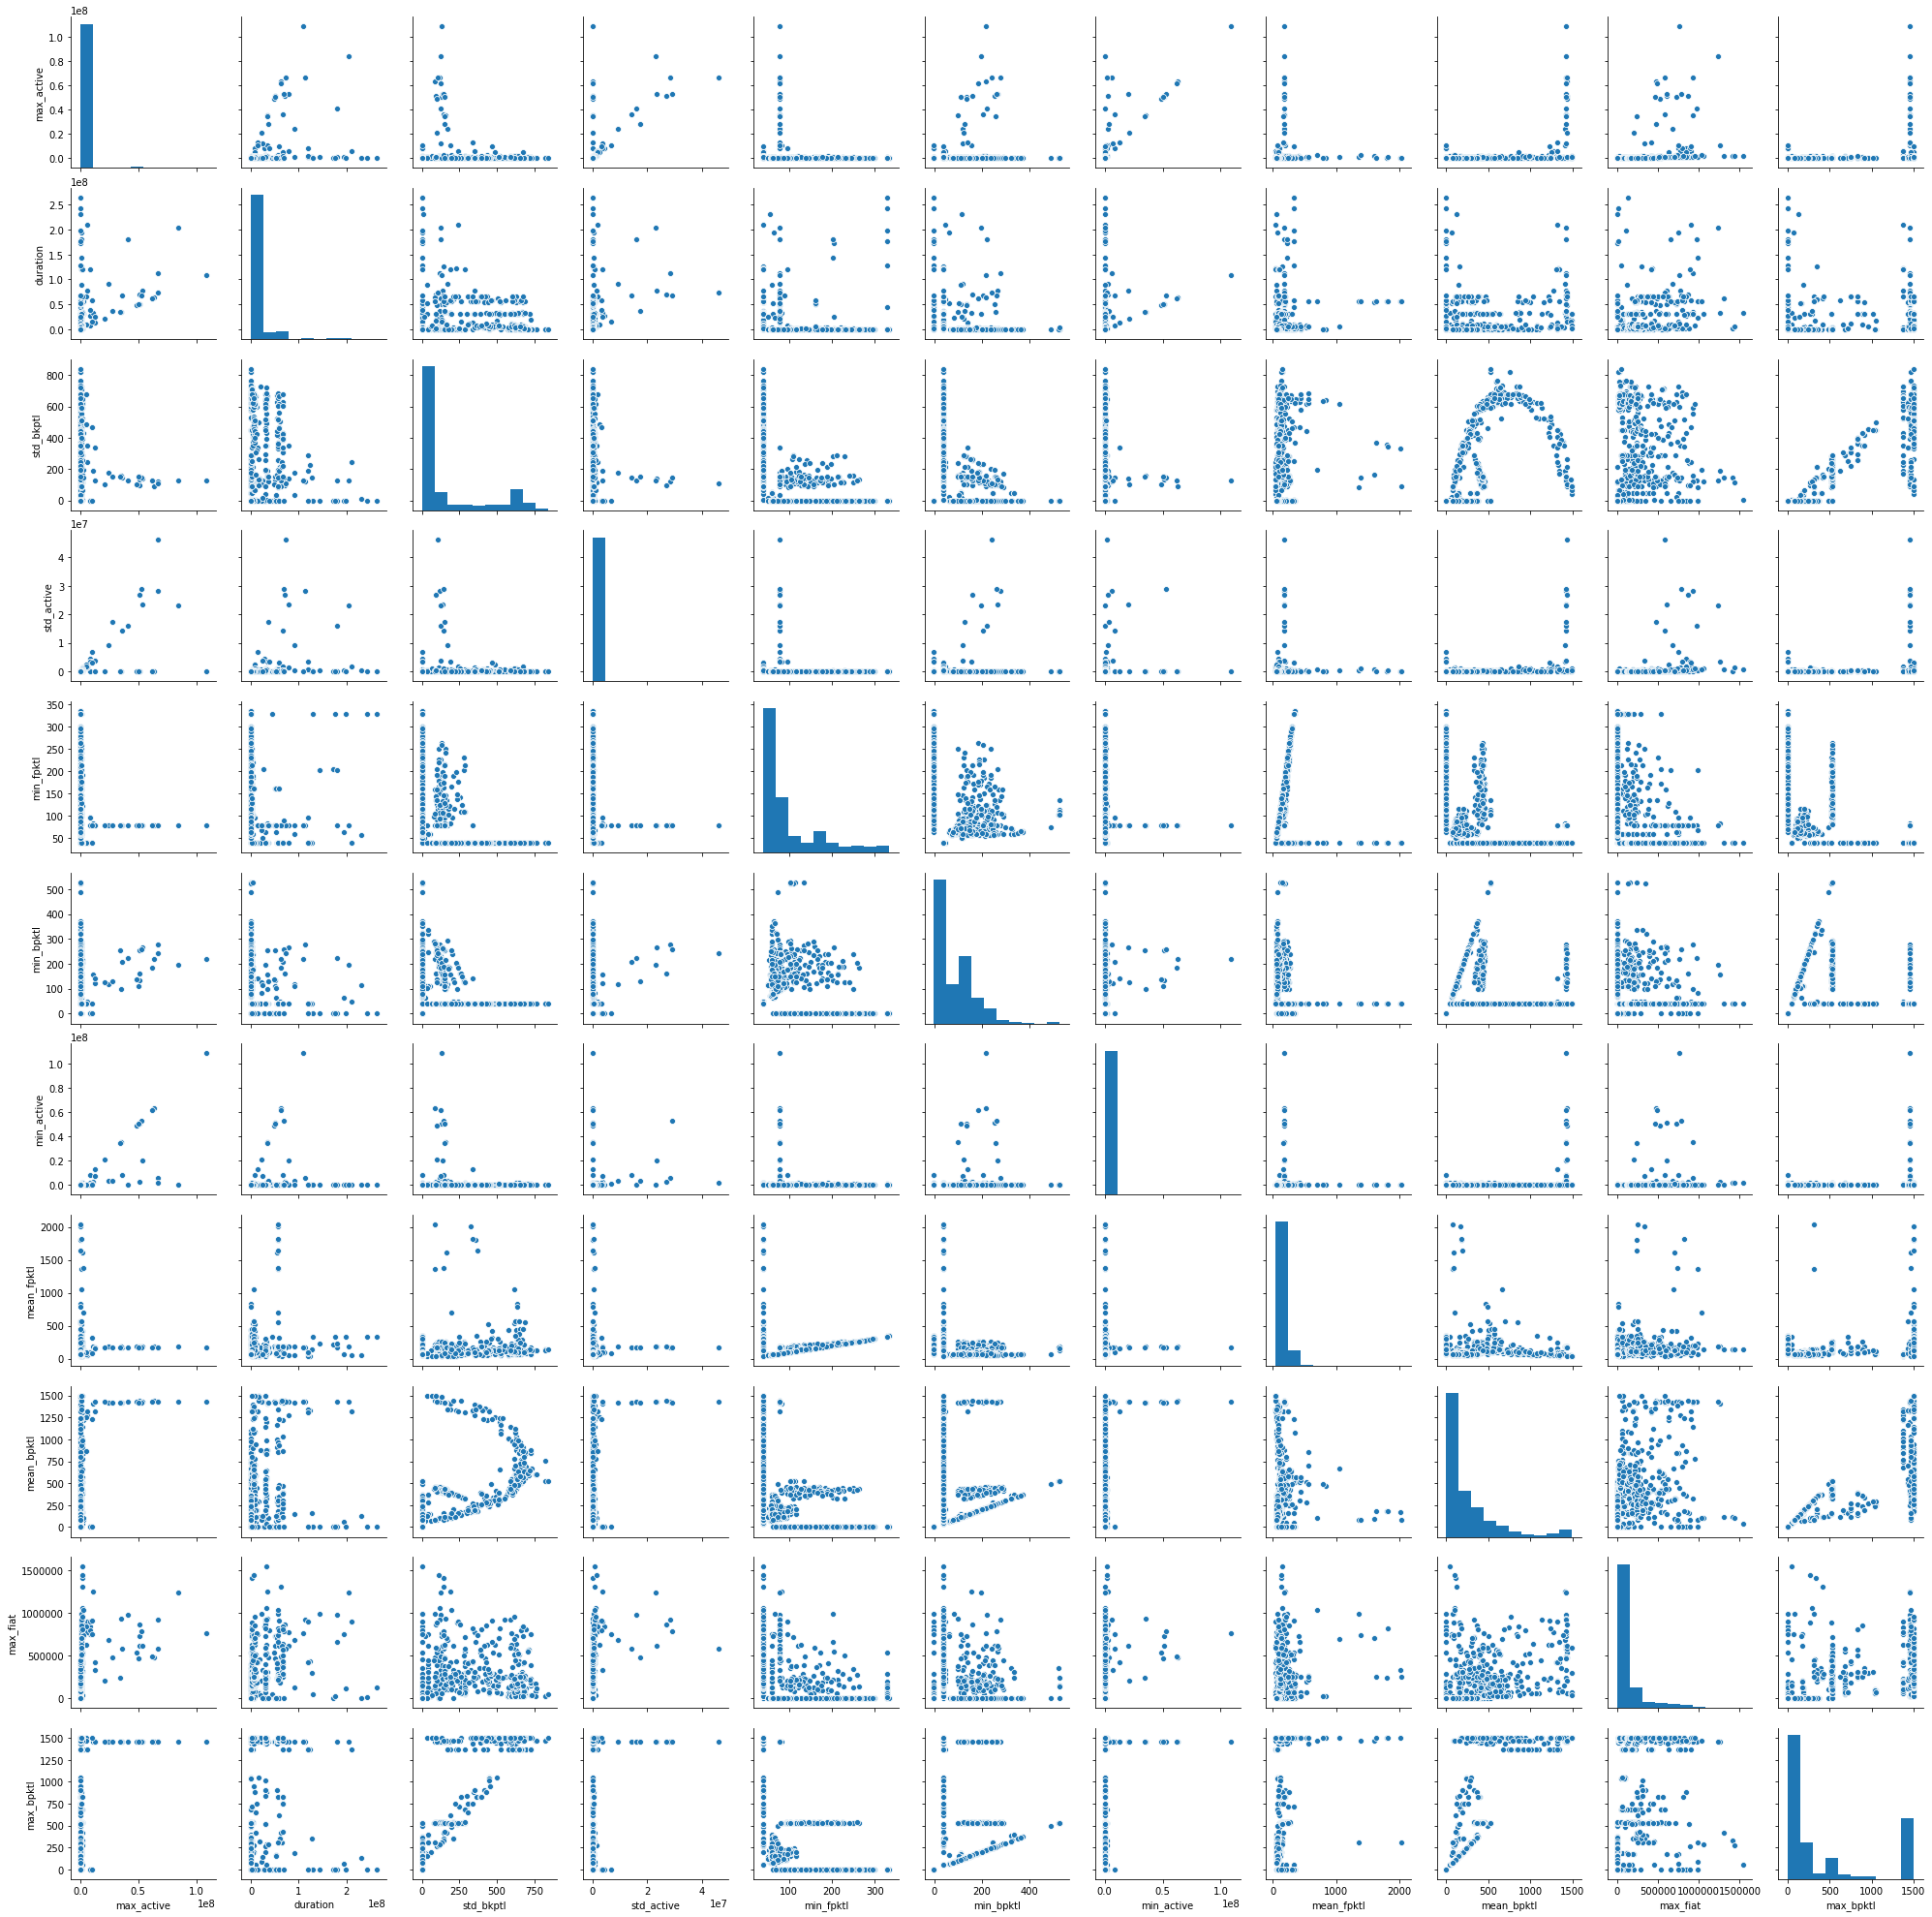

In [26]:
plt.figure(figsize=(30,25))
sns.pairplot(feature_coorelation[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl','max_fiat',
'max_bpktl']])
plt.show()

# BernoulliNB Training

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [28]:
# checking all 45 column names in the dataset
print(df_zeus.columns)

Index(['srcip', 'srcport', 'dstip', 'dstport', 'proto', 'total_fpackets',
       'total_fvolume', 'total_bpackets', 'total_bvolume', 'min_fpktl',
       'mean_fpktl', 'max_fpktl', 'std_fpktl', 'min_bpktl', 'mean_bpktl',
       'max_bpktl', 'std_bkptl', 'min_fiat', 'mean_fiat', 'max_fiat',
       'std_fiat', 'min_biat', 'mean_biat', 'max_biat', 'std_biat', 'duration',
       'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle',
       'mean_idle', 'max_idle', 'std_idle', 'sflow_fpackets', 'sflow_fbytes',
       'sflow_bpackets', 'sflow_bbytes', 'fpsh_cnt', 'bpsh_cnt', 'furg_cnt',
       'burg_cnt', 'total_fhlen', 'total_bhlen', 'is_botnet'],
      dtype='object')


In [29]:
Class_label=data_all.is_botnet
feature_selection=data_all.drop(columns=['is_botnet'])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_coorelation, Class_label, test_size=0.25, random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1025, 12), (342, 12), (1025,), (342,))

In [31]:
from sklearn.naive_bayes import BernoulliNB
Br=BernoulliNB()
Br= Br.fit(X_train , y_train)
Br

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [32]:
y_pred1 = Br.predict(X_test)
#print('Accuracy score= {:.2f}'.format(Br.score(y_pred1, y_test)))

In [33]:
ytest_accscore=accuracy_score(y_test,y_pred1);
print(ytest_accscore)

0.8070175438596491


# BernoulliNB Testing Precision, Recall, F1

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.76      1.00      0.86       203
           1       0.99      0.53      0.69       139

    accuracy                           0.81       342
   macro avg       0.87      0.76      0.78       342
weighted avg       0.85      0.81      0.79       342





In [35]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1))
print('\n')

Confusion Matrix
[[202   1]
 [ 65  74]]




# Decision Tree Testing data ROC CURVE

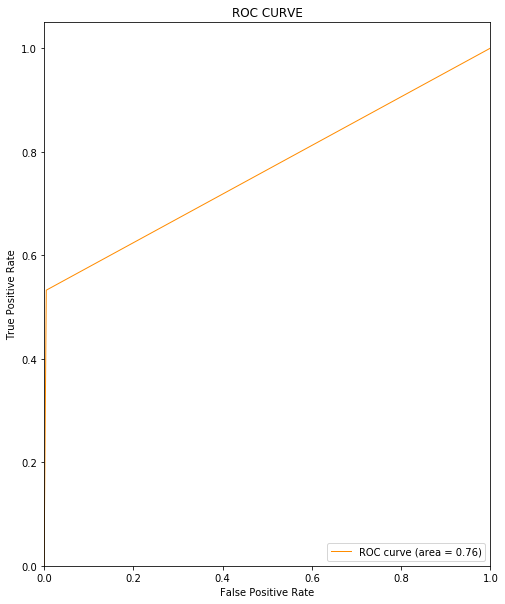

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()

# Decision Tree

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
botnet_data = imputer.fit_transform(data_all)

pd.DataFrame(data=botnet_data, columns=data_all.columns).head()

,duration,max_active,max_biat,max_bpktl,max_fiat,mean_bpktl,mean_fpktl,min_active,min_bpktl,min_fpktl,std_active,std_bkptl,is_botnet
0,165709,165709,0,72,0,72,56,165709,72,56,0,0,1
1,6007884,0,0,-1,0,-1,161,0,-1,161,0,0,1
2,0,0,0,-1,0,-1,161,0,-1,161,0,0,1
3,113348,113348,0,-1,113348,-1,330,113348,-1,328,0,0,1
4,0,0,0,-1,0,-1,161,0,-1,161,0,0,1


In [38]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
enc_X = OrdinalEncoder()
enc_y = LabelEncoder()

In [39]:
X=enc_X.fit_transform(data_all.drop(columns=['is_botnet']))
y=enc_y.fit_transform(data_all.is_botnet)

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.25, random_state=100)
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((1025, 12), (342, 12), (1025,), (342,))

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=142,max_depth=5)
clf.fit(X_train1 , y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=142, splitter='best')

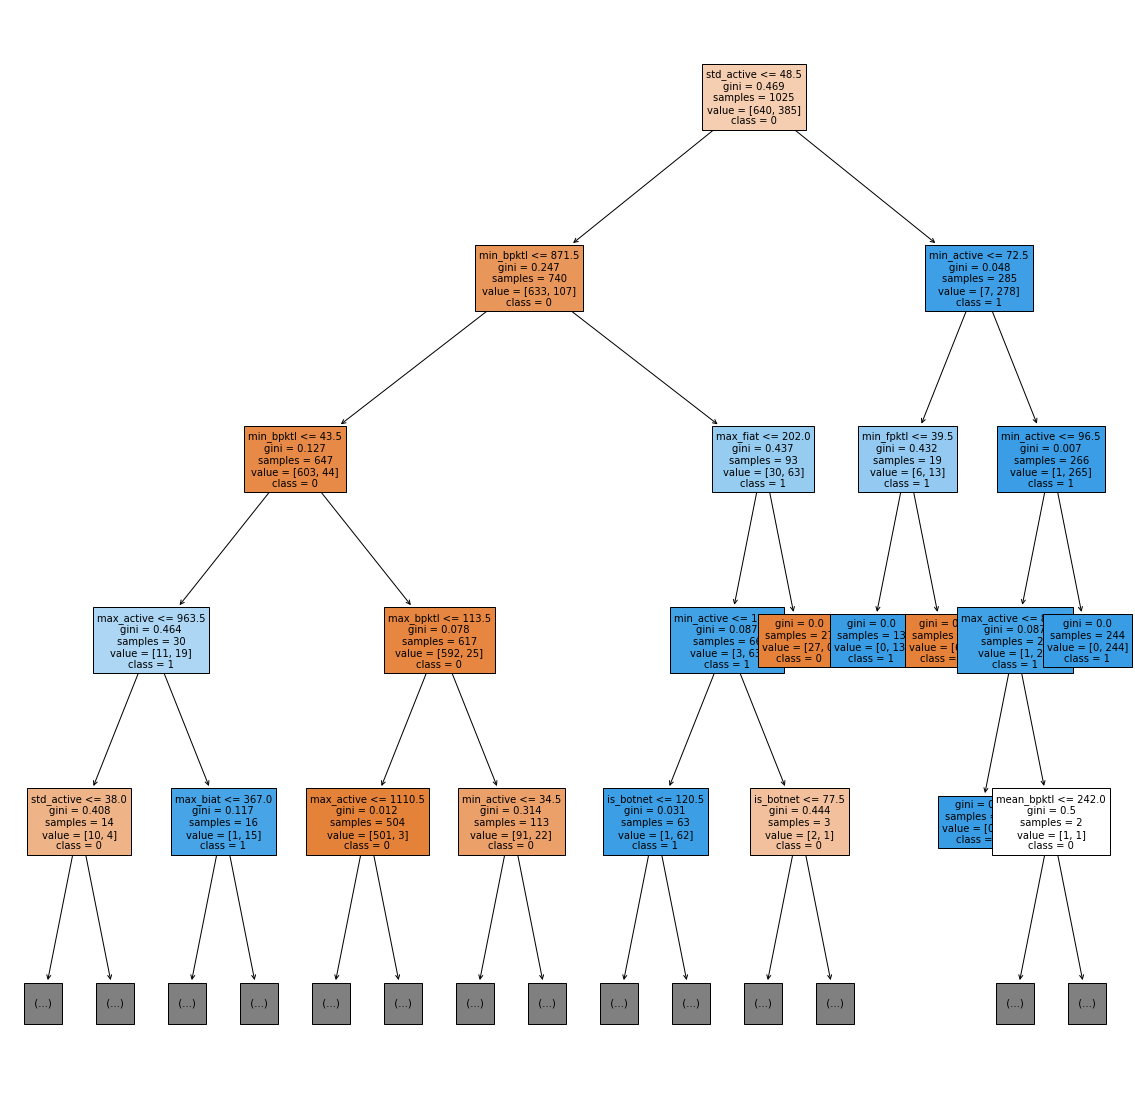

In [42]:
# Visualize the tree structure
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, max_depth=4, filled=True, fontsize=10, 
               feature_names=data_all.columns[1:], class_names=enc_y.classes_.astype(str))
plt.show()

In [43]:
y_dec_tree1 = clf.predict(X_test1)

In [44]:
ytest_accscore=accuracy_score(y_test1,y_dec_tree1);
print('Accuracy Score of decision tree ',ytest_accscore)

Accuracy Score of decision tree  0.9853801169590644


# Decision Tree Testing - Precision, Recall, F1

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test1, y_dec_tree1)
print(CR)

Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       203
           1       0.97      0.99      0.98       139

    accuracy                           0.99       342
   macro avg       0.98      0.99      0.98       342
weighted avg       0.99      0.99      0.99       342



In [46]:
print('Confusion Matrix')
print(confusion_matrix(y_test1,y_dec_tree1))
print('\n')

Confusion Matrix
[[199   4]
 [  1 138]]




### KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# Create and training a KNN classifier model with neighbors 20
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy for 20 neighbors is: ', accuracy)
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))

Testing accuracy for 20 neighbors is:  0.8918128654970761

Confusion Matrix
 col_0        0    1
is_botnet          
0          190   13
1           24  115


In [59]:
# Create and training a KNN classifier model with neighbors 3
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = knn1.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy 3 neighbors is: ', accuracy)
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))

Testing accuracy 3 neighbors is:  0.9327485380116959

Confusion Matrix
 col_0        0    1
is_botnet          
0          193   10
1           13  126


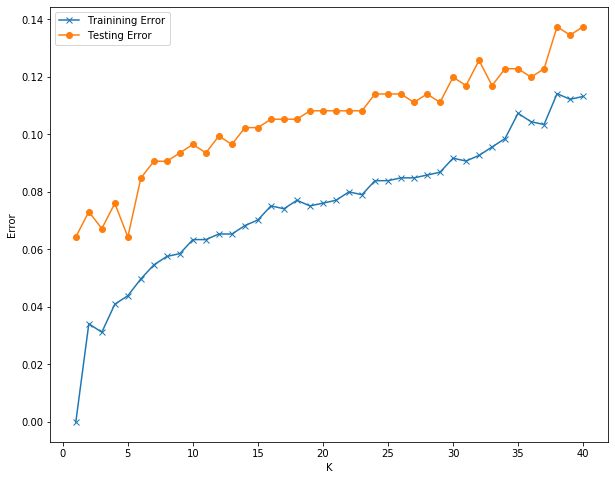

In [50]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    k = KNeighborsClassifier(n_neighbors = i)
    k.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(k.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(k.predict(X_test), y_test))

matplotlib.rcParams['figure.figsize'] = (10 , 8)
# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 55)}

# Create the machine learning model
knn3 = KNeighborsClassifier()
knn3_clf = GridSearchCV(knn3, parameter_grid, scoring='accuracy', cv=10)
knn3_clf.fit(X_train, y_train)

# Identify the best parameter(s)
print('Best K value: ', knn3_clf.best_params_['n_neighbors'])
print('The accuracy: ', knn3_clf.best_score_)

Best K value:  3
The accuracy:  0.9434228060156101


Both the training and testing error increases as the neighbors increase. Error gets introduced as the values of neighbors increase. The model is more stable when there are 3 neighbors.

# NEURAL_NETWORK : Multi-layer Perceptron (MLP) 

In [52]:
 from sklearn.neural_network import MLPClassifier

In [53]:
abc = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

abc.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [54]:
# Use the model to predict testing data
y_pred = abc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy neural network  is: ', accuracy)

Testing accuracy neural network  is:  0.4064327485380117


#### Comparing results of Decision tree with BernoulliNB using t-test

In [55]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_ind

In [56]:
scores_bnb = cross_val_score(Br, X, y, cv=10)
print('Accuracy range for BernoulliNB classifier: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_bnb.min(), scores_bnb.max(), scores_bnb.mean(), scores_bnb.std()))

scores_dtree = cross_val_score(clf, X, y, cv=10)
print('Accuracy range for Decision Tree: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_dtree.min(), scores_dtree.max(), scores_dtree.mean(), scores_dtree.std()))

scores_knn = cross_val_score(knn1, X, y, cv=10)
print('Accuracy range for Knn with best neighbor: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_knn.min(), scores_knn.max(), scores_knn.mean(), scores_knn.std()))

scores_nn = cross_val_score(abc, X, y, cv=10)
print('Accuracy range for multi layer percepton classifier: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_nn.min(), scores_nn.max(), scores_nn.mean(), scores_nn.std()))

Accuracy range for BernoulliNB classifier: [0.7794, 0.8759]; mean: 0.8296; std: 0.0311

Accuracy range for Decision Tree: [0.9416, 0.9926]; mean: 0.9737; std: 0.0173

Accuracy range for Knn with best neighbor: [0.8321, 1.0000]; mean: 0.9635; std: 0.0463

Accuracy range for multi layer percepton classifier: [0.6350, 0.8015]; mean: 0.7271; std: 0.0496



When we look at the accuracy range for the four models is best for Knn algorithm and could be considered in our approach. 

In [57]:
t, p = ttest_ind(scores_knn, scores_bnb)
print ('t, p: %.4f, %.6f\n' % (t, p))

t1, p1 = ttest_ind(scores_knn, scores_dtree)
print ('t1, p1: %.4f, %.6f\n' % (t1, p1))

t3, p3 = ttest_ind(scores_knn, scores_nn)
print ('t3, p3: %.4f, %.6f\n' % (t3, p3))

t, p: 7.2063, 0.000001

t1, p1: -0.6217, 0.541903

t3, p3: 10.4533, 0.000000



When we look t-test scores considering the significance level as 0.05 it is evident that KNN has better probability of detecting a botnet as compared to BernoulliNB and neural network. It can be considered the probability of Knn and Decision Tree will be similar i.e. their performance.